<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
from paquete import importbase as func
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]

/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning:

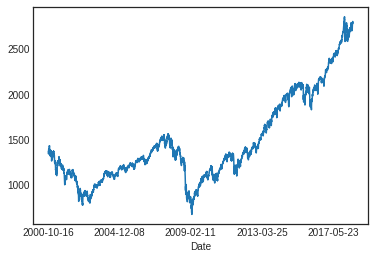

In [4]:
df=pd.read_csv('/home/tiotino/scripts/spy01.csv')
#df.to_csv('/home/tiotino/scripts/dax01.csv')
df.index=df.Date
df.close.plot()

In [5]:
# add the outcome variable, 1 if the trading session was positive (close>open), 0 otherwise
df['outcome'] = np.where(df['close'] > df['open'],1, -1)
# we also need to add three new columns ‘ho’ ‘lo’ and ‘gain’
# they will be useful to backtest the model, later
df['ho'] = df['high'] - df['open'] # distance between Highest and Opening price
df['lo'] = df['low'] - df['open'] # distance between Lowest and Opening price
df['gain'] = df['close'] - df['open']
df.tail()

Date         open         high          low        close  \
Date                                                                         
2018-07-10  2018-07-10  2788.560059  2795.580078  2786.239990  2793.840088   
2018-07-11  2018-07-11  2779.820068  2785.909912  2770.770020  2774.020020   
2018-07-12  2018-07-12  2783.139893  2799.219971  2781.530029  2798.290039   
2018-07-13  2018-07-13  2796.929932  2804.530029  2791.689941  2801.310059   
2018-07-16  2018-07-16  2801.429932  2803.709961  2793.389893  2798.580078   

                volume        rsi       rsi2       rsi7      atr12    ...      \
Date                                                                  ...       
2018-07-10  3063850000  73.359525  96.946153  73.359525  25.003001    ...       
2018-07-11  2964740000  60.437282  43.293227  60.437282  24.841923    ...       
2018-07-12  2821690000  68.391494  75.924471  68.391494  24.871759    ...       
2018-07-13  2614000000  69.287904  78.940385  69.287904  23.869119    ...       
2018-07-16   987379741  67.275764  64.363562  67.275764  22.740032    ...       

           resultado5  bajo  colgado  sumade20  regalo  menorde  outcome  \
Date                                                                       
2018-07-10        0.0   0.0        1       NaN       0      NaN        1   
2018-07-11        0.0   0.0        1       NaN       0      NaN       -1   
2018-07-12        0.0   0.0        1       NaN       0      NaN        1   
2018-07-13        0.0   0.0        1       NaN       0      NaN        1   
2018-07-16        0.0   0.0        1       NaN       0      NaN       -1   

                   ho        lo       gain  
Date                                        
2018-07-10   7.020019 -2.320069   5.280029  
2018-07-11   6.089844 -9.050048  -5.800048  
2018-07-12  16.080078 -1.609864  15.150146  
2018-07-13   7.600097 -5.239991   4.380127  
2018-07-16   2.280029 -8.040039  -2.849854  

[5 rows x 209 columns]

In [6]:
df['ts_1'] = df.outcome.shift(1) # by 1 day
df['ts_2'] = df.outcome.shift(2) # by 2 days
df['ts_3'] = df.outcome.shift(3) # by 3 day
df['ts_4'] = df.outcome.shift(4) # by 4 days
# ...etc....
# it's an arbitrary decision how many days of lag are needed to create a good forecaster, so
# everyone can experiment by his own 
df.tail()

Date         open         high          low        close  \
Date                                                                         
2018-07-10  2018-07-10  2788.560059  2795.580078  2786.239990  2793.840088   
2018-07-11  2018-07-11  2779.820068  2785.909912  2770.770020  2774.020020   
2018-07-12  2018-07-12  2783.139893  2799.219971  2781.530029  2798.290039   
2018-07-13  2018-07-13  2796.929932  2804.530029  2791.689941  2801.310059   
2018-07-16  2018-07-16  2801.429932  2803.709961  2793.389893  2798.580078   

                volume        rsi       rsi2       rsi7      atr12  ...   \
Date                                                                ...    
2018-07-10  3063850000  73.359525  96.946153  73.359525  25.003001  ...    
2018-07-11  2964740000  60.437282  43.293227  60.437282  24.841923  ...    
2018-07-12  2821690000  68.391494  75.924471  68.391494  24.871759  ...    
2018-07-13  2614000000  69.287904  78.940385  69.287904  23.869119  ...    
2018-07-16   987379741  67.275764  64.363562  67.275764  22.740032  ...    

           regalo  menorde  outcome         ho        lo       gain  ts_1  \
Date                                                                        
2018-07-10      0      NaN        1   7.020019 -2.320069   5.280029   1.0   
2018-07-11      0      NaN       -1   6.089844 -9.050048  -5.800048   1.0   
2018-07-12      0      NaN        1  16.080078 -1.609864  15.150146  -1.0   
2018-07-13      0      NaN        1   7.600097 -5.239991   4.380127   1.0   
2018-07-16      0      NaN       -1   2.280029 -8.040039  -2.849854   1.0   

            ts_2  ts_3  ts_4  
Date                          
2018-07-10   1.0   1.0  -1.0  
2018-07-11   1.0   1.0   1.0  
2018-07-12   1.0   1.0   1.0  
2018-07-13  -1.0   1.0   1.0  
2018-07-16   1.0  -1.0   1.0  

[5 rows x 213 columns]

In [7]:
df['feat1'] = np.where(df['close'] > df['close'].shift(),1,-1)
df['feat2'] = np.where(df['close'] > df['close'].shift(2),1,-1)
df['feat3'] = np.where(df['close'] > df['close'].shift(3),1,-1)
df['feat4'] = np.where(df['close'] > df['close'].shift(4),1,-1)
df.feat1=df.feat1.shift()
df.feat2=df.feat2.shift()
df.feat3=df.feat3.shift()
df.feat4=df.feat4.shift()


In [8]:
df=df[['outcome','ho','lo','ts_1','ts_2','ts_3','ts_4','feat1','feat2','feat3','feat4',\
    'gain']]
df.tail()

outcome         ho        lo  ts_1  ts_2  ts_3  ts_4  feat1  \
Date                                                                      
2018-07-10        1   7.020019 -2.320069   1.0   1.0   1.0  -1.0    1.0   
2018-07-11       -1   6.089844 -9.050048   1.0   1.0   1.0   1.0    1.0   
2018-07-12        1  16.080078 -1.609864  -1.0   1.0   1.0   1.0   -1.0   
2018-07-13        1   7.600097 -5.239991   1.0  -1.0   1.0   1.0    1.0   
2018-07-16       -1   2.280029 -8.040039   1.0   1.0  -1.0   1.0    1.0   

            feat2  feat3  feat4       gain  
Date                                        
2018-07-10    1.0    1.0    1.0   5.280029  
2018-07-11    1.0    1.0    1.0  -5.800048  
2018-07-12   -1.0    1.0    1.0  15.150146  
2018-07-13    1.0    1.0    1.0   4.380127  
2018-07-16    1.0    1.0    1.0  -2.849854

In [9]:
len(df)
df=df.dropna()

In [10]:
len(df)
ratio = 0.8 # 80% of training set and 20% of testing set

pepe=int(round(len(df)*ratio,0))

In [11]:
training = df[0:pepe]
testing = df[pepe:]
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
training.corr()

outcome        ho        lo      ts_1      ts_2      ts_3      ts_4  \
outcome  1.000000  0.521903  0.579361 -0.051246 -0.022321 -0.011076 -0.001649   
ho       0.521903  1.000000  0.375030 -0.114820 -0.096005 -0.070279 -0.055443   
lo       0.579361  0.375030  1.000000  0.033277  0.035239  0.023484  0.015537   
ts_1    -0.051246 -0.114820  0.033277  1.000000 -0.051783 -0.022860 -0.011076   
ts_2    -0.022321 -0.096005  0.035239 -0.051783  1.000000 -0.051680 -0.023400   
ts_3    -0.011076 -0.070279  0.023484 -0.022860 -0.051680  1.000000 -0.052218   
ts_4    -0.001649 -0.055443  0.015537 -0.011076 -0.023400 -0.052218  1.000000   
feat1   -0.043123 -0.122143  0.055545  0.922854 -0.057799 -0.013579 -0.008867   
feat2   -0.051246 -0.160237  0.069557  0.448450  0.445531 -0.019325  0.007779   
feat3   -0.019286 -0.143503  0.097300  0.354064  0.322803  0.336438 -0.020336   
feat4   -0.032463 -0.176311  0.093714  0.306001  0.290120  0.283674  0.274241   
gain     0.715590  0.779360  0.740132 -0.054460 -0.034474 -0.024451 -0.023124   

            feat1     feat2     feat3     feat4      gain  
outcome -0.043123 -0.051246 -0.019286 -0.032463  0.715590  
ho      -0.122143 -0.160237 -0.143503 -0.176311  0.779360  
lo       0.055545  0.069557  0.097300  0.093714  0.740132  
ts_1     0.922854  0.448450  0.354064  0.306001 -0.054460  
ts_2    -0.057799  0.445531  0.322803  0.290120 -0.034474  
ts_3    -0.013579 -0.019325  0.336438  0.283674 -0.024451  
ts_4    -0.008867  0.007779 -0.020336  0.274241 -0.023124  
feat1    1.000000  0.471672  0.381065  0.331699 -0.041146  
feat2    0.471672  1.000000  0.619899  0.531251 -0.064344  
feat3    0.381065  0.619899  1.000000  0.688637 -0.035512  
feat4    0.331699  0.531251  0.688637  1.000000 -0.057290  
gain    -0.041146 -0.064344 -0.035512 -0.057290  1.000000

/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning:

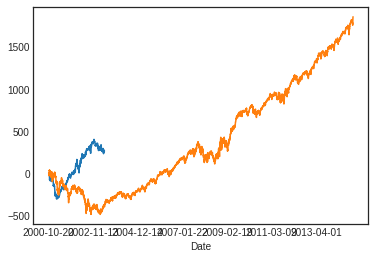

In [12]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
X = training[['ts_1','ts_2','ts_3','ts_4','feat1','feat2','feat3','feat4']]
X=X.dropna()
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
X['labels']=labels
X['gain']=training['gain']
X['gain'][(X.labels==0)].cumsum().plot()
X['gain'].cumsum().plot()


/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/tiotino/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning:

TypeError: Empty 'DataFrame': no numeric data to plot

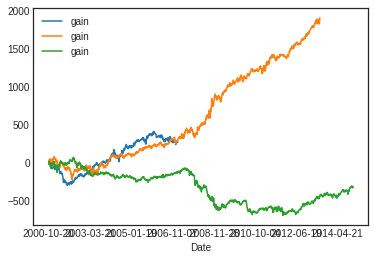

In [13]:
for n in range(0,9,1):
    X['gain'][(X.labels==n)].cumsum().plot(legend=True)

X['tino']=-X['gain'][(X.labels==2)]+X['gain'][(X.labels==3)]

In [ ]:
X.tino.cumsum().plot()

In [ ]:
print X[X.labels==1].tail(10)
print X['gain'][X.labels==1].cumsum().tail(10)

In [ ]:
X = testing[['ts_1','ts_2','ts_3','ts_4','feat1','feat2','feat3','feat4']]
X=X.dropna()
#kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
X['labels']=labels
X['gain']=testing['gain']
X['gain'][X.labels==7].cumsum().plot()

In [ ]:
print X[X.labels==2].tail(10)
print X['gain'][X.labels==1].cumsum().tail(10)

In [ ]:
X.tail()

In [1]:
y = training["outcome"]
X = training[['ts_1','ts_2','ts_3','ts_4','feat1','feat2','feat3','feat4']]
dt = DecisionTreeClassifier(min_samples_split=3, random_state=99)
dt.fit(X, y)

NameError: name 'training' is not defined

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X, y)
clf_gini.score(X, y) # 1.0
from sklearn.metrics import confusion_matrix



In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X, y)

In [ ]:
y_pred = clf_gini.predict(X)
y_pred

In [ ]:
print "Accuracy is ", accuracy_score(y,y_pred)*100
confusion_matrix(y, y_pred)

In [ ]:
y_pred_en = clf_entropy.predict(X)
y_pred_en

In [ ]:
print "Accuracy is ", accuracy_score(y,y_pred_en)*100
confusion_matrix(y, y_pred_en)

In [ ]:
print  np.count_nonzero(y_pred_en[y>0])

In [ ]:
y = testing["outcome"]
X = testing[['ts_1','ts_2','ts_3','ts_4','feat1','feat2','feat3','feat4']]

In [ ]:
y_pred = clf_gini.predict(X)
y_pred

In [ ]:
print "Accuracy is ", accuracy_score(y,y_pred)*100

In [ ]:
y_pred_en = clf_entropy.predict(X)
print len(y_pred_en)
y_pred_en


In [ ]:
print "Accuracy is ", accuracy_score(y,y_pred_en)*100

In [ ]:
testing['pred2']=y_pred_en
testing['pred1']=y_pred
testing[['outcome','pred1','pred2']].tail(15)

In [ ]:
testing['sumapred1']=testing.pred1*testing.gain[testing.pred1==1]
testing['sumapred2']=testing.pred2*testing.gain[testing.pred2==1]

testing=testing.fillna(0)
testing[['sumapred1','sumapred2','gain']].cumsum().plot()
print func.annualised_sharpe(testing.sumapred1)
testing[['sumapred1','sumapred2','gain']].tail(20)


In [ ]:
func.analisys(testing.sumapred1)

In [ ]:
tree.export_graphviz(clf_entropy.tree_, out_file='tree.dot', feature_names=X.columns)

In [ ]:
from subprocess import call

call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])